<a href="https://colab.research.google.com/github/Musu1/Udacity_DataScience/blob/master/GridSearchDetectingOverfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=np.asarray(pd.read_csv('data.csv'))
x=data[:,0:2]
y=data[:,2]

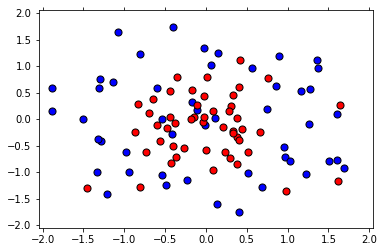

In [29]:
plt.scatter(x[np.argwhere(y==0).flatten(),0], x[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
plt.scatter(x[np.argwhere(y==1).flatten(),0], x[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
plt.xlim(-2.05,2.05)
plt.ylim(-2.05,2.05)
plt.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')
plt.show()

#**Data preprocessing**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,make_scorer
import random

random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# **Decision tree model**

In [0]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

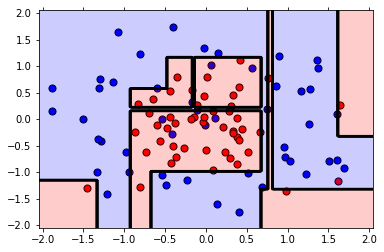

In [32]:
plt.scatter(x[np.argwhere(y==0).flatten(),0],x[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
plt.scatter(x[np.argwhere(y==1).flatten(),0],x[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
plt.xlim(-2.05,2.05)
plt.ylim(-2.05,2.05)
plt.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

r = np.linspace(-2.1,2.1,300)
s,t = np.meshgrid(r,r)
s = np.reshape(s,(np.size(s),1))
t = np.reshape(t,(np.size(t),1))
h = np.concatenate((s,t),1)

z = model.predict(h)

s.shape = (np.size(r),np.size(r))
t.shape = (np.size(r),np.size(r))
z.shape = (np.size(r),np.size(r))

plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
if len(np.unique(z)) > 1:
       plt.contour(s,t,z,colors = 'k', linewidths = 2)
plt.show()

In [33]:
print('The Training F1 Score is', f1_score(y_train_pred, y_train))
print('The Testing F1 Score is', f1_score(y_test_pred, y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.75


Here we can see overfitting through graph also the training f1 score is 1 while testing f1 score is 0.7 which also shows overfitting. Now we will use grid search to tune hyperparameters and reduce overfitting

# **Grid Search**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# **Select the parameters**


In [0]:
model= DecisionTreeClassifier(random_state=42)
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

# **Create a scorer**

In [0]:
scorer = make_scorer(f1_score)

# **Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data**

In [0]:
grid_obj = GridSearchCV(model, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

# **Get the best estimator**


In [0]:
best_model = grid_fit.best_estimator_

# **Predict with the new model**

In [0]:
best_model.fit(X_train, y_train)
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best= best_model.predict(X_test)


In [40]:
print('The Training F1 Score is', f1_score(y_train_pred_best, y_train))
print('The Testing F1 Score is', f1_score(y_test_pred_best, y_test))

The Training F1 Score is 0.8860759493670887
The Testing F1 Score is 0.75


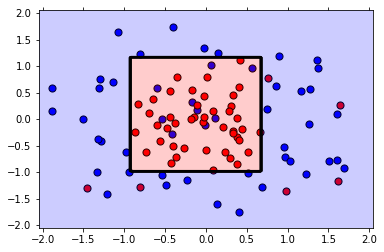

In [42]:
plt.scatter(x[np.argwhere(y==0).flatten(),0],x[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
plt.scatter(x[np.argwhere(y==1).flatten(),0],x[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
plt.xlim(-2.05,2.05)
plt.ylim(-2.05,2.05)
plt.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

r = np.linspace(-2.1,2.1,300)
s,t = np.meshgrid(r,r)
s = np.reshape(s,(np.size(s),1))
t = np.reshape(t,(np.size(t),1))
h = np.concatenate((s,t),1)

z = best_model.predict(h)

s.shape = (np.size(r),np.size(r))
t.shape = (np.size(r),np.size(r))
z.shape = (np.size(r),np.size(r))

plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
if len(np.unique(z)) > 1:
       plt.contour(s,t,z,colors = 'k', linewidths = 2)
plt.show()